# THE SPARKS FOUNDATION




# Task #2-Prediction using Unsupervised ML

### DOMAIN- DATA SCIENCE AND BUSINESS ANALYTICS

###  NAME- SUCHISMITA DAS , NIT ROURKELA

This project will form divide the data into clusters based on other features.
I have dealt with the iris_dataset from Scikit Learn and predicted the optimum no of clusters using elbow meathod and visualized the latter in a scatterplot.

So let,s take a look into the notebook.

In [4]:
#importing libraries required for our model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
#loading the dataset
from sklearn.datasets import load_iris
iris=load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

#####  The data we got is in form of a dictionary . Hence we will put it together into a dataframe so that it will be easy for dealing with it.

In [6]:
# creating the dataframe
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Importing model (KMeans) and finding optimun no of clusters

In [8]:
from sklearn.cluster import KMeans

In [9]:
#to find the optimum no of clusters 
x = df.iloc[:, [0, 1, 2, 3]].values
wcss=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

Text(0.5, 1.0, 'ELBOW GRAPH ')

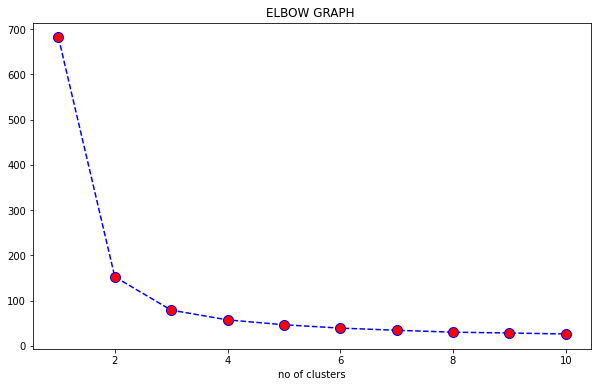

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('no of clusters')
plt.title('ELBOW GRAPH ')

##### This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.From this we choose the number of clusters as ** '3**'. 

In [11]:
# Here we take n_clusters = 3 and again fit our data into the model.

kmeans=KMeans(n_clusters=3)
y_labels=kmeans.fit_predict(x)
y_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [12]:

kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### Let's visualize our data

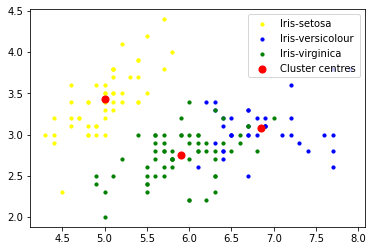

In [61]:
plt.scatter(x[y_labels == 0, 0], x[y_labels == 0, 1], 
            s = 10, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_labels == 1, 0], x[y_labels == 1, 1], 
            s = 10, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_labels == 2, 0], x[y_labels == 2, 1],
            s = 10, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'red', label = 'Cluster centres')
plt.legend(loc='best')


##### So we completed our model and visualized it 